# Final Project - Predicting Movie Genres!

![Movie genre header](genre_header.jpg)

Welcome to the final project of CS109b. 

The overall theme of the final project is movie data with a focus on movie genre prediction, because it is an area where we all are more or less application domain experts. First, you will explore your data and the challenges of the problem by exploratory data analysis. Use visualizations to find features that correlate with movie genres. These can be extracted from the movie posters, or meta data, or other data you gather, for example plot summaries or even movie transcripts. You will then compare traditional statistical or machine learning methods like generalized additive models, random forest, Bayesian prediction methods, boosting, and SVM, to deep learning models for movie genre prediction. 

For this project you will work in teams of 3-4 people and there are weekly milestones to guide you along the way. Even though the milestones are graded, they are mainly in place to make sure you stay in contact with your TF and make progress with the project. Throughout the project you also have room for creativity and to pursue your own ideas. While you need to hand in the milestones at the appropriate due date, there is nothing preventing you from working on a later milestone ahead of time. We suggest that you read through the whole project and all milestones in the beginning to be able to plan ahead. The project is pretty open ended, so you can be creative and let your data science knowledge shine! 

For each milestone you will submit a notebook, in raw (`.ipynb`) and PDF formats, containing the deliverables of that week and the extra work you did so far. The notebooks need to contain your code, comments, explanations, thoughts, and visualizations. The final deliverables are a two-minute screencast, a report in paper style for a general data science audience, and all your data and code that you developed throughout the project. 

Below is a description of the data and the milestones with their due dates. All work is due by 11:59PM on the due date unless otherwise specified. We expect you to have the mandatory parts finished by the milestone due dates, and there will be no extensions. However, we strongly encourage you to plan ahead. For example, you need to think about the classification task early on to plan how you want to assemble your training data, and it is beneficial to start the deep learning work as early as possible. There is nothing hindering you to already train a model in the EDA phase to get a better feel for what challenges might lay ahead with the data. You should also see the milestone requirements as a basis for your own creativity, and we expect that most of you will go beyond the mandatory deliverables. For example, if you have a great idea about an interesting question that has to do with movie genre, but cannot be answered with the data from TMDb or IMDb, feel free to gather more data from somewhere else. 

We provide a data interface in Python, because it is convenient for IMDb, and we will use Python for the deep learning part. Specifically we will use Keras, a deep learning library that provides a high level interface to Google's Tensorflow framework for deep learning. However, if you feel that you prefer to do some of the work, e.g., visualizations or data cleanup, in R then feel free to use it. You can also use Spark to preprocess your data, especially if you collect large amounts of it from other sources. 

*Important:* Your grade for a milestone will depend on the required deliverables you submit at the due date for that milestone. But every milestone, especially the final project submission, can contain additional cool work you did that goes beyond the deliverables spelled out below. 


### Logistics 

Please adhere to the following guidelines for all submissions:
- one submission per team
- notebooks should be submitted as PDF and as raw (`.ipynb`) version
- all notebooks should be executed so they contain relevant visualizations, and other results
- try to make it as easy as possible for the TFs to get all relevant information about your work
- do not submit big data sets, please provide a readme file with a link instead
- the final report should also be submitted as pdf

### Movie Data:

The project is based on two different sources of movie data: [IMDb](http://www.imdb.com/) and [TMDb](https://www.themoviedb.org/). TMDb is great, because it provides the movie posters in addition to the metadata. This is crucial for the deep learning part, in which you will try to predict movie genres from posters. IMDb has more metadata available and will supplement the TMDb data you have. 

TMDb provides an easy to use [API](https://www.themoviedb.org/documentation/api) that allows you to download the data selectively. IMDb does not provide an API, but there is a Python interface available to access the metadata. We will use [IMDbPY](http://imdbpy.sourceforge.net/), which is already installed on the AMI and virtual box images for your convenience.

*Important*: Please remember to limit your data rate when obtaining the data. Play nicely and do not just spam servers as fast as you can. This will prevent your IP from getting banned. The easiest way to do is is to use the [sleep](http://stackoverflow.com/questions/510348/how-can-i-make-a-time-delay-in-python) function in Python.


### Milestone 1: Getting to know your data, due Wednesday, April 5, 2017

In the beginning you should get acquainted with the data sources and do some EDA. Sign up for the TMDb [API](https://www.themoviedb.org/documentation/api), and try to download the poster of your favorite movie from within your notebook. Compare the genre entries of IMDb and TMDb for this movie and see if they are the same. Think about and write down some questions that you would like to answer in the following weeks. Keep the storytelling aspect of your final report in mind and do some pen and paper sketches about the visualizations you would like to produce. Include photographs of those sketches in your notebook. 

Most of the time a data scientist spends on a project is spend on cleaning the data. We are lucky that the data we have is already pretty clean. The Python interface to the IMDb ftp files does a lot of the additional work of cleaning as well. However, you will notice that the genre list for each movie from both databases can have different lengths. This needs to be changed in order to train a model to predict the movie genre. It is up to you to think about possible ways to address this problem and to implement one of them. There is no absolute right answer here. It depends on your interests and which questions you have in mind for the project. 

Optionally, you could also scrape additional data sources, such as Wikipedia, to obtain plot summaries. That data may give you additional useful features for genera classification. 

To guide your decision process, provide at least one visualization of how often genres are mentioned together in pairs. Your visualization should clearly show if a horror romance is more likely to occur in the data than a drama romance.

The notebook to submit for this milestone needs to at least include:

- API code to access the genre and movie poster path of your favorite movie
- Genre for this movie listed by TMDb and IMDb
- A list of the 10 most popular movies of 2016 from TMDb and their genre obtained via the API
- Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them 
- Code to generate the movie genre pairs and a suitable visualization of the result
- Additional visualization sketches and EDA with a focus on movie genres
- A list of questions you could answer with this and related data. Get creative here!

The EDA questions do not necessarily have to tie into the modeling part later on. Think freely about things that might be interesting, like which actors are very specific to a genre? Are action movies more prone to producing sequels than romances? However, as you keep the focus on movie genres, think also about correlations you might discover that can help building features from the metadata for prediction. Is the length of a movie title correlated with genre?


In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
import tmdbsimple as tmdb
from imdb import IMDb

In [2]:
tmdb.API_KEY = '773942cc01458fe938520ff5b448e747'

In [3]:
conf = tmdb.Configuration()
c_info = conf.info()

Complete list of the poster sizes from TMDB

In [4]:
img_conf = c_info['images']
img_conf['poster_sizes']

[u'w92', u'w154', u'w185', u'w342', u'w500', u'w780', u'original']

Complete list of the genres from TMDB

In [5]:
genres = tmdb.Genres().list()
tmdb_genres = [g['name'] for g in genres['genres'] ]
tmdb_genres

[u'Action',
 u'Adventure',
 u'Animation',
 u'Comedy',
 u'Crime',
 u'Documentary',
 u'Drama',
 u'Family',
 u'Fantasy',
 u'History',
 u'Horror',
 u'Music',
 u'Mystery',
 u'Romance',
 u'Science Fiction',
 u'TV Movie',
 u'Thriller',
 u'War',
 u'Western']

Complete list of the genres from IMDB (copied from the site)

In [6]:
imdb_genres = ['Action','Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family','Fantasy','Game','Show','History','Horror','Music','Musical','Mystery','News','Reality-TV','Romance','Sci-Fi','Sitcom','Sport','Talk-Show','Thriller','War','Western']
imdb_genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game',
 'Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sitcom',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [7]:
search = tmdb.Search()
response = search.movie(query="ghost in the shell")
for s in search.results:
    print(s['title'], s['id'], s['release_date'], s['popularity'])                        

(u'Ghost in the Shell', 315837, u'2017-03-29', 28.867185)
(u'Ghost in the Shell', 9323, u'1995-11-18', 8.095278)
(u'Ghost in the Shell 2.0', 14092, u'2008-07-12', 3.558751)
(u'Ghost in the Shell 2: Innocence', 12140, u'2004-03-06', 3.606525)
(u'Ghost in the Shell Arise - Border 5: Pyrophoric Cult', 381519, u'2015-08-26', 2.856959)
(u'Ghost in the Shell Arise - Border 1: Ghost Pain', 196750, u'2013-06-22', 2.444761)
(u'Ghost in the Shell: The New Movie', 334376, u'2015-06-20', 2.517147)
(u'Ghost in the Shell: Stand Alone Complex - Solid State Society', 18874, u'2007-02-23', 2.425263)
(u'Ghost in the Shell: Stand Alone Complex - The Laughing Man', 18839, u'2005-01-01', 1.544837)
(u'Ghost in the Shell Arise - Border 2: Ghost Whispers', 212168, u'2013-11-29', 2.04271)
(u'Ghost In The Shell: The Movie Virtual Reality Diver', 384217, u'2016-02-02', 1.14117)
(u'Ghost in the Shell Arise - Border 3: Ghost Tears', 240341, u'2014-06-28', 2.027633)
(u'Ghost in the Shell Arise - Border 4: Ghost Sta

In [8]:
tmdb_movie_id = 315837
tmdb_movie = tmdb.Movies(tmdb_movie_id)
info = tmdb_movie.info()
info['title']

u'Ghost in the Shell'

The movie genres from TMDB

In [9]:
for tmdb_genre in info['genres']:
    print tmdb_genre['name']

Action
Drama
Science Fiction


The movie poster image from TMDB

In [11]:
Image(url= img_conf['base_url'] + img_conf['poster_sizes'][1] + tmdb_movie.poster_path)

In [12]:
imdb_service = IMDb()
imdb_movie_id = info['imdb_id'][2:]
imdb_movie = imdb_service.get_movie(imdb_movie_id)

The movie genres from IMDB

In [12]:
for imdb_genres in imdb_movie.data['genres']:
    print imdb_genres

Action
Crime
Drama
Mystery
Sci-Fi
Thriller


IMDB has a comprehensive list of genres, we use IMDB as the main source

In [16]:
def combinedGenres(imdb_movie, tmdb_movie):
    imdb_movie_genres = [g['name'] for g in tmdb_movie['genres']]
    tmdb_movie_genres = imdb_movie.data['genres']
    tmdb_movie_genres = [g.replace('Science Fiction', 'Sci-Fi') for g in tmdb_movie_genres]
    return list(set(tmdb_movie_genres) | set(tmdb_movie_genres))

In [365]:
discover = tmdb.Discover()
disc_result_2016 = discover.movie(query = 'primary_release_year=2016&sort_by=popularity.desc')

A list of the 10 most popular movies of 2016 from TMDb

In [23]:
top_movies_2016 = disc_result_2016['results']
for top_movie in top_movies_2016[:10]:
    tmdb_movie = tmdb.Movies(top_movie['id']).info()
    imdb_movie = imdb_service.get_movie(info['imdb_id'][2:])
    print top_movie['id'], top_movie['title'], combinedGenres(imdb_movie, tmdb_movie)

Woman


In [2]:
#keenan's code
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import ast
from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict
from operator import itemgetter

In [3]:
movie_df37 = pd.read_csv('Milestone_1/tmdb_movies_3700.csv', names = [
    'adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id',
    'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies',
    'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
    'video', 'vote_average', 'vote_count',
])

In [4]:
movie_df112 = pd.read_csv('Milestone_1/tmdb_movies_11291.csv', names = [
    'adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id',
    'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies',
    'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
    'video', 'vote_average', 'vote_count',
])

In [5]:
def genre_clean(df):
    genres = []
    all_genre = []
    for row in df['genres'].tolist():
        cur_row = []
        for entry in ast.literal_eval(row):
            cur_row.append(str(entry[u'name']))
            all_genre.append(str(entry[u'name']))
        genres.append(' '.join(cur_row))
    return (genres, list(set(all_genre)))
genre_meta = genre_clean(movie_df37)
movie_df37['genre_vals'] = genre_meta[0]
movie_df112['genre_vals'] = genre_clean(movie_df112)[0]

In [8]:
def pca_and_naclean_temp(df):
    sub = df.dropna()
    X = pd.DataFrame(sub, columns=['budget', 'popularity', 'revenue', 'runtime', 'vote_average'])
    pca = PCA(n_components=3)
    X_r = pca.fit(X).transform(X)
    return sub, X_r

In [9]:
clean_mov112, X_r = pca_and_naclean_temp(movie_df112)
clean_mov112['pc1'] = X_r[:,0]
clean_mov112['pc2'] = X_r[:,1]
clean_mov112['pc3'] = X_r[:,2]

C:\Users\Keenan\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Keenan\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Keenan\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [10]:
clean_mov37, X_r = pca_and_naclean_temp(movie_df37)
clean_mov37['pc1'] = X_r[:,0]
clean_mov37['pc2'] = X_r[:,1]
clean_mov37['pc3'] = X_r[:,2]

C:\Users\Keenan\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Keenan\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Keenan\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [11]:
def plot_pca_3(a_g, df, ds = ''):
    fig = plt.figure(figsize=(30, 12))
    ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
    #for the sake of simplicty, I counted any movie with genre x as having genre x, so the same movie may pop up in the same spot with a different genre
    for g in a_g:
        ax1.scatter(df[df['genre_vals'].str.contains(g)]['pc1'], df[df['genre_vals'].str.contains(g)]['pc2'],df[df['genre_vals'].str.contains(g)]['pc3'], c=np.random.rand(3,1), label=('Genre: '+str(g)))
    ax1.set_xlabel('Component 1')
    ax1.set_ylabel('Component 2')
    ax1.set_zlabel('Component 3')
    ax1.set_title('Data projected onto the first 3 PCA components'+ds)
    ax1.legend()
    plt.show()

def plot_pca_2(a_g, df, ds = ''):
    fig = plt.figure(figsize=(30, 12))
    ax1 = fig.add_subplot(1, 2, 1)
    #for the sake of simplicty, I counted any movie with genre x as having genre x, so the same movie may pop up in the same spot with a different genre
    for g in a_g:
        ax1.scatter(df[df['genre_vals'].str.contains(g)]['pc1'], df[df['genre_vals'].str.contains(g)]['pc2'], c=np.random.rand(3,1), label=('Genre: '+str(g)))
    ax1.set_xlabel('Component 1')
    ax1.set_ylabel('Component 2')
    ax1.set_title('Data projected onto the first 2 PCA components'+ds)
    ax1.legend()
    plt.show()

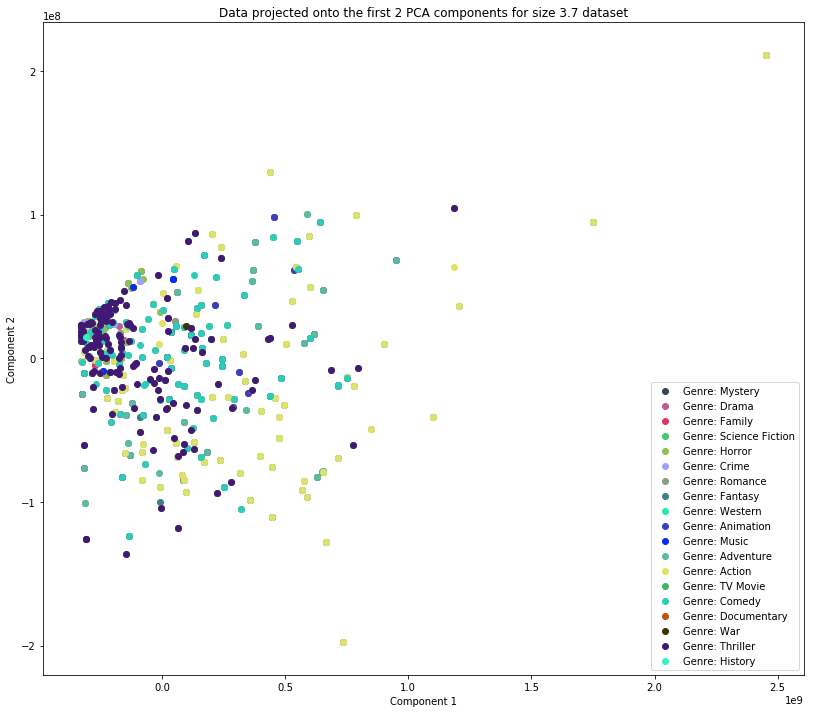

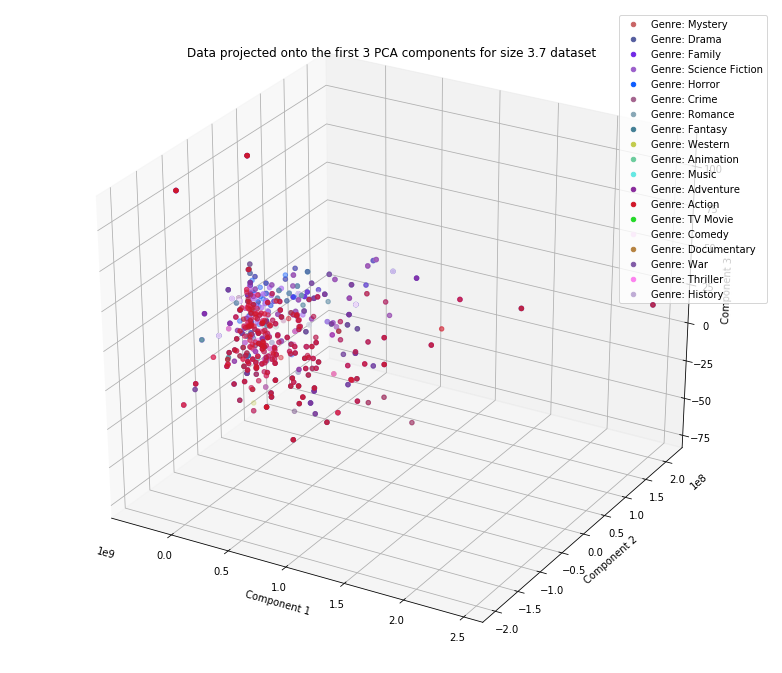

In [12]:
plot_pca_2(genre_meta[1], clean_mov37, ds = ' for size 3.7 dataset')
plot_pca_3(genre_meta[1], clean_mov37, ds = ' for size 3.7 dataset')

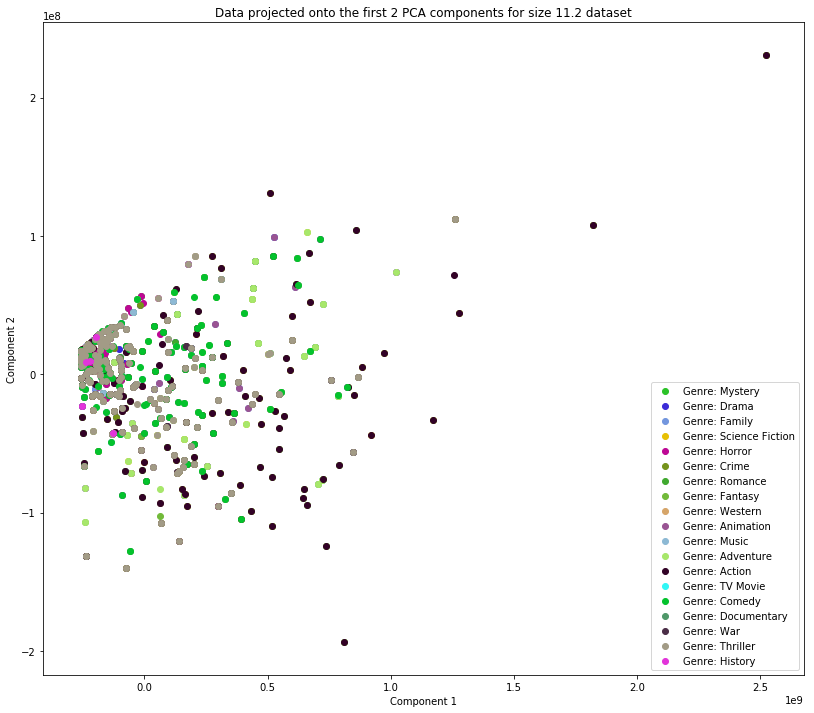

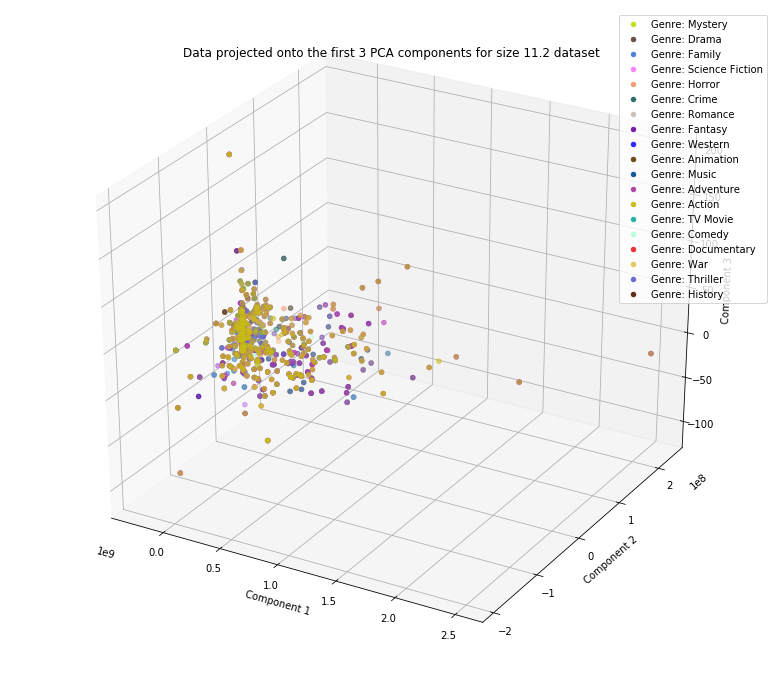

In [13]:
plot_pca_2(genre_meta[1], clean_mov112, ds = ' for size 11.2 dataset')
plot_pca_3(genre_meta[1], clean_mov112, ds = ' for size 11.2 dataset')

In [18]:
def create_dic_and_plot(df, every_genre, ds = ''):
    freq_dic = {}
    for genre in every_genre:
        temp = float(len(df[df['genre_vals'].str.contains(genre)]))/float(len(df))
        key = genre + ':(' + str(round(temp, 4)*100) + '%)'
        freq_dic[key] = temp
    new = OrderedDict(sorted(freq_dic.items(), key=itemgetter(1)))
    
    plt.bar(range(len(new)), new.values(), align='center', color= 'blue')
    plt.xticks(range(len(new)), new.keys(), rotation=90)
    plt.ylabel('Frequencies')
    plt.xlabel('Genres')
    plt.title('Percentiles of Movies within Each Genre (For all genres within a movie)'+ds)
    plt.show()

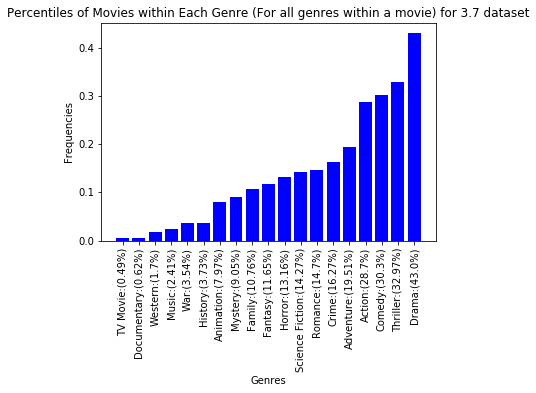

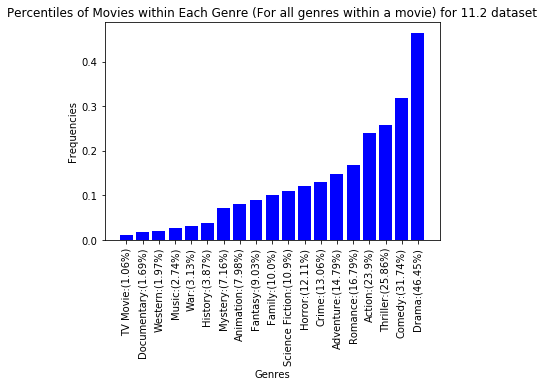

In [20]:
create_dic_and_plot(movie_df37, genre_meta[1], ' for 3.7 dataset')
create_dic_and_plot(movie_df112, genre_meta[1], ' for 11.2 dataset')

### Milestone 2: Assembling training data, due Wednesday, April 12, 2017

We are aware that you have little time this week, due to the midterm. So this milestone a bit easier to achieve than the others. The goal for this week is to prepare the data for the modeling phase of the project. You should end up with a typical data setup of training data X and data labels Y.

The exact form of X and Y depends on the ideas you had previously. In general though Y should involve the genre of a movie, and X the features you want to include to predict the genre. Remember from the lecture that more features does not necessarily equal better prediction performance. Use your application knowledge and the insight you gathered from your genre pair analysis and additional EDA to design Y. Do you want to include all genres? Are there genres that you assume to be easier to separate than others? Are there genres that could be grouped together? There is no one right answer here. We are looking for your insight, so be sure to describe your decision process in your notebook. 

In preparation for the deep learning part we strongly encourage you to have two sets of training data X, one with the metadata and one with the movie posters. Make sure to have a common key, like the movie ID, to be able to link the two sets together. Also be mindful of the data rate when you obtain the posters. Time your requests and choose which poster resolution you need. In most cases w500 should be sufficient, and probably a lower resolution will be fine.

The notebook to submit this week should at least include:

- Discussion about the imbalanced nature of the data and how you want to address it
- Description of your data
- What does your choice of Y look like?
- Which features do you choose for X and why? 
- How do you sample your data, how many samples, and why?

*Important*: You do not need to upload the data itself to Canvas.

### Milestone 3: Traditional statistical and machine learning methods, due Wednesday, April 19, 2017

Think about how you would address the genre prediction problem with traditional statistical or machine learning methods. This includes everything you learned about modeling in this course before the deep learning part. Implement your ideas and compare different classifiers. Report your results and discuss what challenges you faced and how you overcame them. What works and what does not? If there are parts that do not work as expected, make sure to discuss briefly what you think is the cause and how you would address this if you would have more time and resources. 

You do not necessarily need to use the movie posters for this step, but even without a background in computer vision, there are very simple features you can extract from the posters to help guide a traditional machine learning model. Think about the PCA lecture for example, or how to use clustering to extract color information. In addition to considering the movie posters it would be worthwhile to have a look at the metadata that IMDb provides. 

You could use Spark and the [ML library](https://spark.apache.org/docs/latest/ml-features.html#word2vec) to build your model features from the data. This may be especially beneficial if you use additional data, e.g., in text form.

You also need to think about how you are going to evaluate your classifier. Which metrics or scores will you report to show how good the performance is?

The notebook to submit this week should at least include:

- Detailed description and implementation of two different models
- Description of your performance metrics
- Careful performance evaluations for both models
- Visualizations of the metrics for performance evaluation
- Discussion of the differences between the models, their strengths, weaknesses, etc. 
- Discussion of the performances you achieved, and how you might be able to improve them in the future

#### Preliminary Peer Assessment

It is important to provide positive feedback to people who truly worked hard for the good of the team and to also make suggestions to those you perceived not to be working as effectively on team tasks. We ask you to provide an honest assessment of the contributions of the members of your team, including yourself. The feedback you provide should reflect your judgment of each team member’s:

- Preparation – were they prepared during team meetings?
- Contribution – did they contribute productively to the team discussion and work?
- Respect for others’ ideas – did they encourage others to contribute their ideas?
- Flexibility – were they flexible when disagreements occurred?

Your teammate’s assessment of your contributions and the accuracy of your self-assessment will be considered as part of your overall project score.

Preliminary Peer Assessment: [https://goo.gl/forms/WOYC7pwRCSU0yV3l1](https://goo.gl/forms/WOYC7pwRCSU0yV3l1)

### Milestone 4: Deep learning, due Wednesday, April 26, 2017

For this milestone you will (finally) use deep learning to predict movie genres. You will train one small network from scratch on the posters only, and compare this one to a pre-trained network that you finetune. [Here](https://keras.io/getting-started/faq/#how-can-i-use-pre-trained-models-in-keras) is a description of how to use pretrained models in Keras.

You can try different architectures, initializations, parameter settings, optimization methods, etc. Be adventurous and explore deep learning! It can be fun to combine the features learned by the deep learning model with a SVM, or incorporate meta data into your deep learning model. 

**Note:** Be mindful of the longer training times for deep models. Not only for training time, but also for the parameter tuning efforts. You need time to develop a feel for the different parameters and which settings work, which normalization you want to use, which model architecture you choose, etc. 

It is great that we have GPU's via AWS to speed up the actual computation time, but you need to be mindful of your AWS credits. The GPU instances are not cheap and can accumulate costs rather quickly. Think about your model first and do some quick dry runs with a larger learning rate or large batch size on your local machine. 

The notebook to submit this week should at least include:

- Complete description of the deep network you trained from scratch, including parameter settings, performance, features learned, etc. 
- Complete description of the pre-trained network that you fine tuned, including parameter settings, performance, features learned, etc. 
- Discussion of the results, how much improvement you gained with fine tuning, etc. 
- Discussion of at least one additional exploratory idea you pursued

### Milestone 5: Final submission, report and screencast, due Wednesday, May 3, 2017

The grand finale! Gather all your experiences, ideas, results, and discussions into one coherent final report that tells a compelling story and produce a 2 minute screencast that summarizes it. 

Your report needs to be max. 6 pages long (no more!) and include text and visualizations. Your audience are data scientists who did not spend any time pondering movie genre classification problems. Those data scientists do have the same background as you (e.g., you do not need to explain what PCA means) but they are not familiar with your data and the specific problems and questions you faced. Make sure to use good storytelling principles to write your reports. 

The screencast is for the same audience and needs to be max. 2 minutes long (no longer!). Do not just scroll through your notebook while talking--that is boring and confusing. You can extract visualizations from your notebook or produce new visuals and slides for a narrated presentation. Please use a good microphone and test the sound quality. Do not underestimate the time it takes to do a good job on your screencast. Start early, write a script, and collect additional materials that you might want to show. 

[Upload](https://support.google.com/youtube/answer/57407?co=GENIE.Platform%3DDesktop&hl=en) your screenscast to YouTube.

What to submit this week:

- Up to date versions of all your notebooks
- README to go with the notebooks that explains how much the notebooks changed since the milestone submissions. This is to guide your TF to find the relevant updates
- The 6 page final report as a PDF
- The link to your 2 minute screencast on YouTube
- A link to a .zip file with all your cleaned data

#### Final Peer Assessment

It is important to provide positive feedback to people who truly worked hard for the good of the team and to also make suggestions to those you perceived not to be working as effectively on team tasks. We ask you to provide an honest assessment of the contributions of the members of your team, including yourself. The feedback you provide should reflect your judgment of each team member’s:

- Preparation – were they prepared during team meetings?
- Contribution – did they contribute productively to the team discussion and work?
- Respect for others’ ideas – did they encourage others to contribute their ideas?
- Flexibility – were they flexible when disagreements occurred?

Your teammate’s assessment of your contributions and the accuracy of your self-assessment will be considered as part of your overall project score.

Final Peer Assessment: [https://goo.gl/forms/YYFqGbDEfFWeNaSC2](https://goo.gl/forms/YYFqGbDEfFWeNaSC2)